# Лабораторная работа №3
## Выполнил студент группы БФИ1902 Копытько Сергей Максимович 


# Задание 1
Реализовать методы поиска подстроки в строке. Добавить возможность
ввода строки и подстроки с клавиатуры. Предусмотреть возможность
существования пробела. Реализовать возможность выбора опции
чувствительности или нечувствительности к регистру. Оценить время работы
каждого алгоритма поиска и сравнить его со временем работы стандартной
функции поиска, используемой в выбранном языке программирования.
Алгоритмы:
1.Кнута-Морриса-Пратта
2.Упрощенный Бойера-Мура
# Задание 2 «Пятнашки»
Игра в 15, пятнашки, такен — популярная головоломка, придуманная
в 1878 году Ноем Чепмэном. Она представляет собой набор
одинаковых квадратных костяшек с нанесёнными числами, заключённых в
квадратную коробку. Длина стороны коробки в четыре раза больше длины
стороны костяшек для набора из 15 элементов, соответственно в коробке
остаётся незаполненным одно квадратное поле. Цель игры — перемещая
костяшки по коробке, добиться упорядочивания их по номерам, желательно
сделав как можно меньше перемещений.
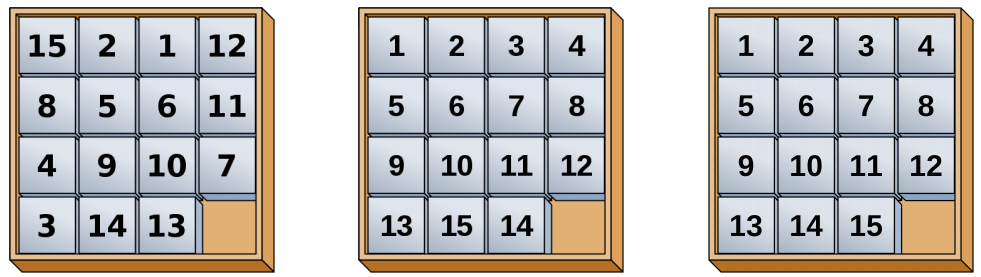
На рисунках выше изображены различные позиции элементов в задаче:
1. Левый рисунок — одна из возможных начальных позиций элементов.
2. Средний рисунок — одна из «нерешаемых» позиций.
3. Правый рисунок — позиция, где все элементы расставлены в
правильном порядке. 

### Задание №1
### Метод Кнута-Морриса-Пратта

In [1]:
%%time
def prefixCalc(text, find):
    new_text = find + "#" + text
    prefix = []
    for i in range(len(new_text)):
        prefix.append(0)
    for i in range(1, len(new_text)):
        k = prefix[i - 1]
        while k > 0 and new_text[k] != new_text[i]:
            k = prefix[k - 1]
        if new_text[k] == new_text[i]:
            k += 1
        prefix[i] = k
    return prefix

def searchKMP(text, find, ignore):
    result = []
    if ignore:
        text=text.lower()
        find=find.lower()    
    prefix = prefixCalc(text, find)
    prefix = prefix[len(find) + 1:]
    for i in range(len(prefix)):
        if prefix[i]==len(find):
            result.append([i - len(find) + 1, i])
    return result

text=input("\nИсходный текст: ")
search_str=input("Подстрока: ")

print("Чувствительность к регистру:\n1-Выкл\n2-Вкл")
case=int(input())

if(case==1):
    result=searchKMP(text,search_str,True)
else:
    result=searchKMP(text,search_str,False)

print(result)


Исходный текст: abbaababaaaaaaaabbbbbbbbabaaabba
Подстрока: abba
Чувствительность к регистру:
1-Выкл
2-Вкл
2
[[0, 3], [28, 31]]
Wall time: 53.5 s


### Метод Бойера-Мура

In [2]:
%%time
def tableCalc(find):
    length=len(find)
    table = []
    for i in range(256):
        table.append(length)
    for i in range(length - 1):
        table[ord(find[i])] = length - 1 - i
    return table

def searchBM(text, find, ignore):
    result = []
    nxt = 0
    length=len(find)
    if ignore:
        text=text.lower()
        find=find.lower()
    table = tableCalc(find)
    while len(text) - nxt >= length:
        if text[nxt:(nxt + length)] == find:
            result.append((nxt, nxt + length - 1))
        nxt += table[ord(text[nxt + length - 1])]
    return result

text=input("\nИсходный текст: ")
search_str=input("Подстрока: ")

print("Чувствительность к регистру:\n1-Выкл\n2-Вкл")
case=int(input())

if(case==1):
    result=searchBM(text,search_str,True)
else:
    result=searchBM(text,search_str,False)

print(result)


Исходный текст: ruquytqtewyqertqweqwqewqwertyuut
Подстрока: qwer
Чувствительность к регистру:
1-Выкл
2-Вкл
2
[(23, 26)]
Wall time: 48.5 s


### Задание №2

In [3]:
%%time
from queue import PriorityQueue

N = 4

# Движение пятнашек
def moves(position):
    blank = position.index(0)
    i, j = divmod(blank, N)
    offsets = []
    if i > 0: offsets.append(-N)     # вниз
    if i < N - 1: offsets.append(N)  # вверх
    if j > 0: offsets.append(-1)     # вправо
    if j < N - 1: offsets.append(1)  # влево
    for offset in offsets:
        swap = blank + offset
        yield tuple(position[swap] if x==blank else position[blank] if x==swap else position[x] for x in range(N*N))

# Функция для определения есть решение или нет
def parity(permutation):
    seen, cycles = set(), 0
    for i in permutation:
        if i not in seen:
            cycles += 1
            while i not in seen:
                seen.add(i)
                i = permutation[i]
    return (cycles + len(permutation)) % 2

# Класс позиции
class Position:
    # Конструктор класса, который принимает позицию и начальную дистанцию
    def __init__(self, position, start_distance):
        self.position = position
        self.start_distance = start_distance

    # Метод, который срабатывает при сравнении (<) объектта с другим объектом
    def __lt__(self, other):
        return self.start_distance < other.start_distance

    # Метод, который срабатывает при использовании объекта как строки
    def __str__(self):
        return '\n'.join((N*'{:3}').format(*[i%(N*N) for i in self.position[i:]]) for i in range(0, N*N, N))

# Разгадка
SOLVED = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 0)
# Загадка
start = [1, 2, 3, 4, 5, 6, 7, 8, 13, 9, 11, 12, 10, 14, 15, 0]

# Смотрим, можно ли в данной расстановке найти решение
# Если нет, то сообщаем об этом
if parity(start) == 0:
    print('Нерешаемо')
# Иначе ищем этот путь
else:
    # Кортеж загадки
    start = tuple(start)
    
    # Первоначальная позиция
    p = Position(start, 0)
    print("Первоначальная позиция: " + "\n", p)
    print()
    
    # 1) Кладем в очередь с приоритетом первоначальную позицию
    candidates = PriorityQueue()
    candidates.put(p)

    # Кортеж посещенных позиций
    visited = set([p])

    # Откуда пришли
    came_from = {p.position: None}
    
    # Пока решение не найдено
    while p.position != SOLVED:
        # 2) Извлекаем из очереди позицию с наименьшим приоритетом
        p = candidates.get()
        # 3) Кладем в очередь все соседние позиции
        # 4) Повторяем пункты 2-4 пока в пункте 2 не вытащим конечную позицию
        for k in moves(p.position):
            if k not in visited:
                # В candifates хранятся всевозможные позиции
                candidates.put(Position(k, p.start_distance + 1))
                came_from[k] = p
                visited.add(k)

    # path - последовательное решение головоловки (путь)
    path = []
    # Сохраняем конечную позицию
    prev = p
    # Идем в обратном порядке и запоминаем очередность хода в path
    while p.position != start:
        # Запоминаем откуда ход
        p = came_from[p.position]
        number = p.position[prev.position.index(0)]
        path.append(number)
        prev = p
    path.reverse()

    print("Оптимальный путь к решению:" + "\n", path)

Первоначальная позиция: 
   1  2  3  4
  5  6  7  8
 13  9 11 12
 10 14 15  0

Оптимальный путь к решению:
 [15, 14, 10, 13, 9, 10, 14, 15]
Wall time: 30 ms


## Вывод
### В этой лабораторной работе была изучена реализация методов поиска подстроки в строке, а также задание «Пятнашки»